In [51]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
from sklearn.decomposition import TruncatedSVD
%matplotlib inline
from scipy.optimize import differential_evolution

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [3]:
# функция косинуса между векторами
def cosine( a, b ):
 
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [31]:
# цикл поиска максимально похожих пользователей
like_users = [] 
for user_x in range(len(raitings)):
    max_ = 0
    for y in range(len(raitings)):
        if (y != user_x) and (cosine(raitings[user_x], raitings[y]) > max_):
            max_ = cosine(raitings[user_x], raitings[y])
            user_y = y
    like_users.append([user_x, user_y])

# пары похожих пользователей
like_users

[[0, 8],
 [1, 4],
 [2, 9],
 [3, 9],
 [4, 8],
 [5, 9],
 [6, 3],
 [7, 5],
 [8, 0],
 [9, 2]]

In [36]:
# уменьшим с помощью SVD
svd = TruncatedSVD(n_components=5)
raitings_min = svd.fit_transform(raitings)
# сжатие до 5-ти признаков
raitings_min

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

$f(x) = tg^2(sin(x) + cos(2x+3))$  

Производная:

$f'(x)=2{\cdot}tan(sin(x)+cos(2x+3)){\cdot}(tan(sin(x)+cos(2x+3)))$
$f'(x)=2{\cdot}tan(sin(x)+cos(2x+3)){\cdot}(1+tan^2(sin(x)+cos(2x+3))){\cdot}(sin(x)+cos(2x+3)) = 2{\cdot}tan(sin(x)+cos(2x+3)){\cdot}(1+tan^2(sin(x)+cos(2x+3))){\cdot}(cos(x)-sin(2x+3){\cdot}(2x+3)) = 2{\cdot}tan(sin(x)+cos(2x+3)){\cdot}(1+tan^2(sin(x)+cos(2x+3))){\cdot}(cos(x)-sin(2x+3){\cdot}(2x+3))=2 {\cdot} tan(sin(x)+cos(2x+3)) {\cdot} (1+tan^2(sin(x)+cos(2x+3))) {\cdot} (cos(x)-2 {\cdot} sin(2x+3))$  


в точке $x_0=1$:

$f'(1)=2{\cdot}tan(sin(1)+cos(2{\cdot}1+3)){\cdot}(1+tan^2(sin(1)+cos(2{\cdot}1+3))){\cdot}(cos(1)-2{\cdot}sin(2{\cdot}1+3))$  

In [64]:
diff = (2*np.tan(np.sin(1) + np.cos(5)) * (1 + np.tan(np.cos(5) + np.sin(1))**2)) * (np.cos(1) - 2 * np.sin(5))
diff

55.385917635337854

In [44]:
from scipy.misc import derivative

def func(x):
    return (np.tan(np.sin(x) + np.cos(2*x+3)))**2

derivative(func, 1, dx=1e-6)

55.3859176464222

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [45]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [46]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [47]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

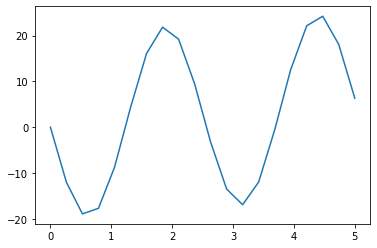

In [48]:
plt.plot(x, fx)
plt.show()

In [49]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [52]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(error, bounds, recombination=0.9, mutation=0.1, seed=42)
result

     fun: 1.5099704695487048e-06
 message: 'Optimization terminated successfully.'
    nfev: 483
     nit: 13
 success: True
       x: array([ 3. , -2.5])

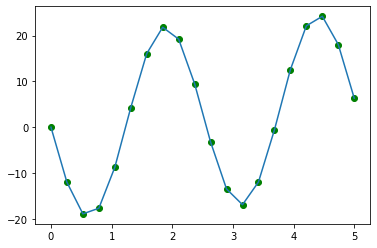

In [61]:
plt.scatter(x, fx, color='green',  marker='o')
plt.plot(x, f(x, 3, -2.5))
plt.show()

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [78]:
# дискретная случайная величина с 20 значениями
random = np.random.randint(1, 11, 20)
random

array([ 2,  3,  5,  5,  9,  2, 10,  1,  7,  5,  1,  9,  4,  2,  4,  5,  6,
        7,  8,  3])

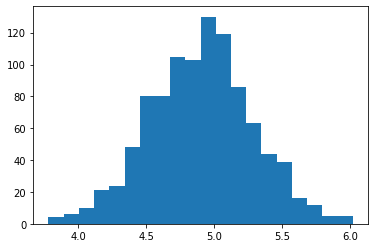

In [81]:
# сгенерирем выборку
means = np.array([])
for i in range(1000):
    means = np.append(means,np.random.choice(random, 50).mean())
    
plt.hist(means, 20)
plt.show()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [82]:
A = np.array([[1, 4],
              [1, 1]])
A

array([[1, 4],
       [1, 1]])

In [86]:
n, v = np.linalg.eig((A))
for i in range(len(n)):
    print(f'Собственное значение {n[i]}')
    print(f'соответствующий ему собственный вектор {v[:,i]}')

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]


Вычислим

$\left|\begin{matrix}
1-\lambda & 4 \\
1 & 1-\lambda
\end{matrix}\right| = 
\lambda^2-2\lambda-3=(\lambda+1)\cdot(\lambda-3)$

Собственные значения:

$\lambda_1=-1\\
\lambda_2=3$

Собственный вектор для значения -1

$
 V_1 = \begin{cases}
   (1+1) \cdot x_1 + 4 \cdot x_2 = 0\\
   x_1 + (1 + 1) \cdot x_2 = 0
 \end{cases}
$

$V_1 = \begin{pmatrix}
  -2\\
  1
\end{pmatrix}$
 
 
Собственный вектор для значения 3
 
 $
V_2 = \begin{cases}
   (1-3) \cdot x_1 + 4 \cdot x_2 = 0\\
   x_1 + (1 - 3) \cdot x_2 = 0
 \end{cases}
$

$V_2 = \begin{pmatrix}
  2\\
  1
\end{pmatrix}$